Aluno: Eric Monteiro dos Reis <br>
Disciplina: Cálculo Numérico (CAN22005) <br>
Professor: Sergio Luciano Avila





# **Problema**: <br>
Para o circuito abaixo, podemos definir a amplitude da corrente `Im` como:

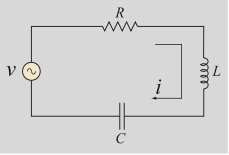
<br>
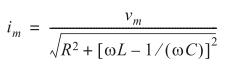

Considerando:<br>
R = 140 ohms<br>
L = 260mH<br>
C = 25uF<br>
Vm = 24V<br>
w = 2*pi*f<br>

Determinar a frequência `f` necessária para obtermos uma corrente `Im = 0.15A`.


# **Porquê que o problema demonstrado acima é um problema?**

O uso de circuitos RLC é algo muito comum no contexto da construção de dispositivos eletrônicos e a frequência de operação é crucial para o cálculo da corrente do circuito. Um valor incorreto da corrente pode não somente levar o circuito a não operar corretamente como também pode até mesmo danificar ou sobrecarregar o dispositivo.

A solução da equação de Im é de complexidade alta, pois estamos trabalhando com um sistema não linear onde desejamos obter o valor de f, fazendo com que isolar a variável 'f' apresenta manipulações com operações complexas.

Poderiamos solucionar também o problema de forma empírica, através da tentativa e erro utilizando a equação apresentada, porém isso seria uma forma muito trabalhosa de resolver o problema.

Devido as razões mencionadas acima, estaremos resolvendo o problema utilizando o **Método da Bissecção**. Esse método é um método simples de entender o conceito e possui uma implementação em Python simples e além disso podemos especificar o percentual de erro desejado.

# Solução do problema utilizando o Método da Bissecção e Python

In [54]:
import math
import matplotlib.pyplot as plt
import numpy as np
from typing import Optional

In [75]:
def bisection_method(f, a, b, error_tol, max_iter=16) -> Optional[dict]:
    """
        Resolve a raiz desconhecida de uma função não linear, dado a função inserida pelo usuário,
        os limites superior e inferior iniciais da raiz, a tolerância máxima de erro desejada e o
        número de iterações que o algoritmo será realizado.
    Args:
        f : A função definida pelo usuário
        a : O limite inferior inicial da raiz
        b : O limite superior inicial da raiz
        error_tol : O erro máximo desejado pelo usuário
        max_iter : Número máximo de iterações que o método irá executar. Padrão é 16.

    Returns:
        dict: Um dicionário contendo o ponto médio encontrado pelo algoritmo e o número de
        iterações que foram usadas para realizar os cálculos.
    """
    hp = (a + b) / 2

    if f(a) * f(b) > 0:
        return print(f'Nenhuma raiz da função foi encontrada entre o intervalo {a} e {b}')

    c = 0
    error = abs(f(a) - f(b))

    while error > error_tol:
        if c > max_iter:
            return print(f'Número máximo de {max_iter} iterações excedido.')

        hp = (a + b) / 2.0

        if f(hp) == 0:
            return {"hp": hp, "iteration": c}
        elif f(a) * f(hp) < 0:
            b = hp
            c += 1
        else:
            a = hp

        error = abs(f(b) - f(a))

    return {"hp": hp, "iteration": c}

In [76]:
R = 140  # Ohm
L = 260 * 10**(-3)  # H
C = 25 * 10**(-6)  # F
Vm = 24  # V
Im = 0.15  # A

def func(f):
    """Função a ser avaliada"""
    omega = 2 * math.pi * f

    num = Vm
    den = math.sqrt(R**2 + (omega * L - 1 / (omega * C))**2)

    return Im - (num / den)

def func_check(f):
    """Calcula a corrente diretamente com base na frequência.

      O propósito desta função é verificar se o resultado calculado usando
      o método da bisseção está correto.
    """

    omega = 2 * math.pi * f

    num = Vm
    den = math.sqrt(R**2 + (omega * L - 1 / (omega * C))**2)

    return num / den

Root is approximately 43.0859 with 4 iterations


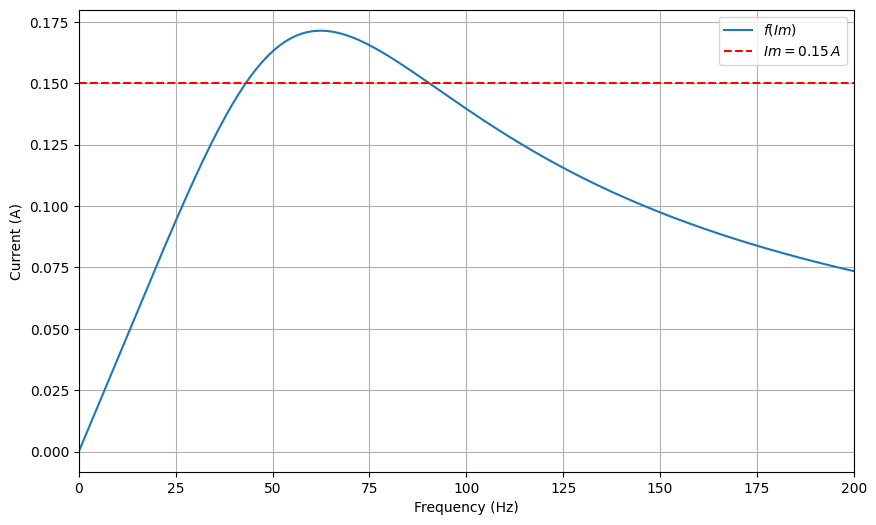

In [80]:
Xa = 30
Xb = 50
err = 0.0001

if result := bisection_method(func, Xa, Xb, err, max_iter=20):
    print(f'Root is approximately {result["hp"]:.4f} with {result["iteration"]} iterations')

frequencies = np.linspace(0.1, 1000, 1000)  # De 0.1 a 1000 com 1000 amostras
plot_data = [func_check(f) for f in frequencies]

# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(frequencias, plot_data, label=r"$f(Im)$")
plt.axhline(y=Im, color="red", linestyle="--", label=f"$Im = {Im} \, A$")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Current (A)")
plt.xlim(0, 200) # Mostrando somente até 200Hz
plt.legend()
plt.grid(True)
plt.show()

Outra forma de validarmos o resultado obtido é utilizando a função `func_check`. Com ela podemos cálcular para um dado valor de frequência, qual seria o valor correspondente da corrente Im.<br>
Dessa forma podemos validar se o resultado obtido através do método da bissecção está correto.

In [78]:
func_check(result['hp'])

0.1500409567784976

Referências bibliográficas:<br>
GILAT, A.; SUBRAMANIAM, V. *Métodos numéricos para engenheiros e cientistas: uma introdução com aplicações usando o MATLAB*. 1. ed. Wiley, 2007.

